## MMSB: 250 Movies, 20 users

In [1]:
from IPython.core.debugger import Tracer
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import utils
import mmsb

%matplotlib inline
matplotlib.style.use('ggplot')
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [2]:
data = pd.read_csv('../data/movie_lens/ml100k_train.csv', header=None)
names = pd.read_table('../data/movie_lens/ml-100k/u.item', header=None, sep='|')[1]
data[0] = data[0] - 1 # 0-index
data[1] = data[1] - 1

In [3]:
test = pd.read_csv('../data/movie_lens/ml100k_heldout.csv', header=None)
test[0] = test[0] - 1 # 0-index
test[1] = test[1] - 1

In [4]:
data = data[data[3] <= 20] # Consider 20 users only
test = test[test[3] <= 20] # Consider 20 users only

In [5]:
data = data[data[1] < 250] # Consider first 250 movies only
test = test[test[1] < 250] # Consider first 250 movies only

In [6]:
X = data[[0,1,2]].values
X.shape

(2939, 3)

In [7]:
max(X[:,1]) + 1

250

In [8]:
test_X = test[[0,1,2]].values
test_X.shape

(770, 3)

# K=5

0:00:20.431839


(-1896.4653645951248, -1896.4653645951248)

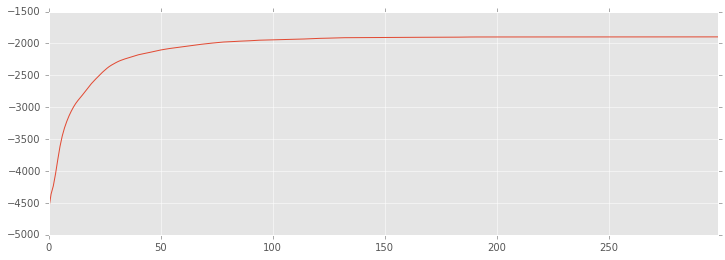

In [37]:
K = 5
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

In [42]:
pd.DataFrame(B).round(2)

,0,1,2,3,4
0,0.50,0.97,0.24,0.00,0.12
1,0.03,0.50,0.00,0.00,0.00
2,0.76,1.00,0.50,0.03,0.14
3,1.00,1.00,0.97,0.50,1.00
4,0.88,1.00,0.86,0.00,0.50


In [39]:
probs = [gamma[:,p].dot(B).dot(gamma[:,q]) for p, q, v in test_X]
sum(test_X[:,2] == np.round(probs)) / float(len(test_X))

0.75194805194805192

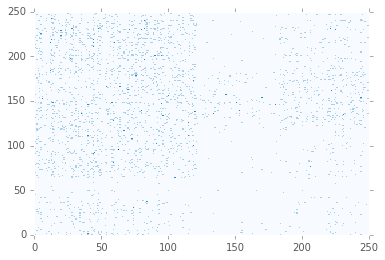

In [40]:
I = pd.DataFrame(utils.get_interactions(X))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

In [41]:
pd.DataFrame(gamma).idxmax().value_counts()

4    67
3    61
2    58
0    39
1    25
dtype: int64

## Accuracy as function of K

In [20]:
accs = []

def run_test(K):
    gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, K, n_iter=300)
    probs = [gamma[:,p].dot(B).dot(gamma[:,q]) for p, q, v in test_X]
    return sum(test_X[:,2] == np.round(probs)) / float(len(test_X))
    

In [21]:
K = 1
acc = run_test(K)
accs.append((K, acc))

0:00:14.168861


In [22]:
K = 2
acc = run_test(K)
accs.append((K, acc))

0:00:15.607989


In [23]:
K = 3
acc = run_test(K)
accs.append((K, acc))

0:00:17.679506


In [25]:
K = 4
acc = run_test(K)
accs.append((K, acc))

0:00:18.164960


In [26]:
K = 5
acc = run_test(K)
accs.append((K, acc))

0:00:19.982011


In [27]:
K = 6
acc = run_test(K)
accs.append((K, acc))

0:00:22.934189


In [28]:
K = 7
acc = run_test(K)
accs.append((K, acc))

0:00:24.633319


In [29]:
K = 8
acc = run_test(K)
accs.append((K, acc))

0:00:28.176099


In [30]:
K = 12
acc = run_test(K)
accs.append((K, acc))

0:00:53.181024


In [31]:
K = 16
acc = run_test(K)
accs.append((K, acc))

0:01:35.487842


In [32]:
K = 20
acc = run_test(K)
accs.append((K, acc))

0:02:38.039606


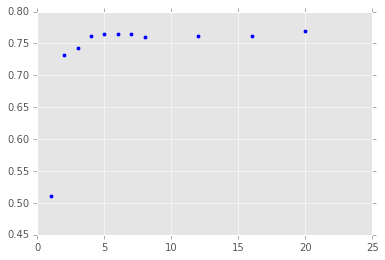

In [33]:
x, y = zip(*accs)
plt.scatter(x=x, y=y)

Running test 1
0:00:14.508677
Running test 2
0:00:15.969320
Running test 3
0:00:17.160819
Running test 4
0:00:17.867895
Running test 5
0:00:19.555135
Running test 6
0:00:21.735861
Running test 7
0:00:24.798729
Running test 8
0:00:28.087177
Running test 12
0:00:53.524310
Running test 16
0:01:37.521780
Running test 20
0:02:42.091754


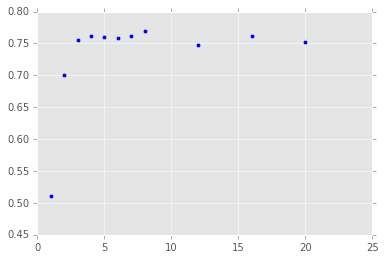

In [43]:
accs2 = []

def run_test(K):
    print 'Running test', K
    gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, K, n_iter=300)
    probs = [gamma[:,p].dot(B).dot(gamma[:,q]) for p, q, v in test_X]
    return sum(test_X[:,2] == np.round(probs)) / float(len(test_X))

for k in [1,2,3,4,5,6,7,8,12,16,20]:
    accs2.append((k,run_test(k)))
    
x, y = zip(*accs2)
plt.scatter(x=x, y=y)